In [1]:
import os
import cv2
import numpy as np
image_dir = os.path.join("dataset")
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labels=[]
for images_dir in os.listdir("dataset"):
    labels.append(images_dir)
    
for root, dirs, files in os.walk(image_dir):
    for f in files:
        if f.endswith("png") or f.endswith('jpg'):
            path = os.path.join(root,f)
            label = os.path.basename(root)
        

        
label_encoder = LabelEncoder()
integer_labels = label_encoder.fit_transform(labels)
# Use one hot encoder to convert integer labels to binary vectors
onehot_encoder = OneHotEncoder(sparse=False)
integer_labels = integer_labels.reshape(len(integer_labels), 1)
onehot_labels = onehot_encoder.fit_transform(integer_labels)


label_with_onehot_encod={}

for i,j in zip(labels, onehot_labels):
    label_with_onehot_encod[i]=j
    

def create_label(images_label):
    return label_with_onehot_encod.get(images_label)
    


for label in labels:
    print(label,create_label(label))


Prabhat [1. 0. 0. 0. 0.]
Rabindra [0. 1. 0. 0. 0.]
Riju [0. 0. 1. 0. 0.]
Rojina [0. 0. 0. 1. 0.]
Yujan [0. 0. 0. 0. 1.]


In [2]:
import os
import cv2
from random import shuffle
from tqdm import tqdm
import numpy as np

for images_dir in tqdm(os.listdir("dataset")):
    path=os.path.join("dataset",images_dir)
    for image in os.listdir(path):
        inner_path = os.path.join(path,image)
        image_data =cv2.imread(inner_path,cv2.IMREAD_GRAYSCALE)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:39<00:00,  7.88s/it]


In [3]:
import os
import cv2
from random import shuffle
from tqdm import tqdm
import numpy as np




def mydata():
    data=[]
    for images_dir in tqdm(os.listdir("dataset")):
        path=os.path.join("dataset",images_dir)
        for image in os.listdir(path):
            inner_path = os.path.join(path,image)
            image_data =cv2.imread(inner_path,cv2.IMREAD_GRAYSCALE)
            image_data =cv2.resize(image_data, (64,64))
            data.append([np.array(image_data),create_label(images_dir)])

    shuffle(data)
    return data 


data = mydata()

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:04<00:00,  1.18it/s]


In [4]:
train = data[:4500]
test = data[4500:]
x_train = np.array([i[0]  for i in train]).reshape(-1,64,64,1)
y_train = np.array([i[1] for i in train])
print(x_train.shape)
print(y_train.shape)
x_test = np.array([i[0] for i in test]).reshape(-1,64,64,1)
y_test = np.array([i[1] for i in test])
print(x_test.shape)
print(y_train.shape)

(4500, 64, 64, 1)
(4500, 5)
(500, 64, 64, 1)
(4500, 5)


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

# Define the CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)
model.save('my_model.h5')

Epoch 1/10
141/141 [==============================] - 30s 200ms/step - loss: 0.2729 - accuracy: 0.9322 - val_loss: 0.0142 - val_accuracy: 0.9980
Epoch 2/10
141/141 [==============================] - 27s 191ms/step - loss: 0.0148 - accuracy: 0.9944 - val_loss: 0.0058 - val_accuracy: 0.9960
Epoch 3/10
141/141 [==============================] - 27s 188ms/step - loss: 0.0058 - accuracy: 0.9969 - val_loss: 6.6422e-04 - val_accuracy: 1.0000
Epoch 4/10
141/141 [==============================] - 27s 194ms/step - loss: 0.0014 - accuracy: 0.9993 - val_loss: 2.0550e-04 - val_accuracy: 1.0000
Epoch 5/10
141/141 [==============================] - 27s 193ms/step - loss: 0.0010 - accuracy: 0.9993 - val_loss: 0.0072 - val_accuracy: 0.9940
Epoch 6/10
141/141 [==============================] - 27s 189ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 7/10
141/141 [==============================] - 27s 188ms/step - loss: 0.0050 - accuracy: 0.9980 - val_loss: 0.0040 

In [6]:
def data_for_testing():
    Tdata=[]
    for images in tqdm(os.listdir("Testing images")):
        path=os.path.join("Testing images",images)
        image_id = images.split('.')[0]
        image_data =cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        image_data =cv2.resize(image_data, (64,64))
        Tdata.append([np.array(image_data),image_id])

    shuffle(Tdata)
    return Tdata 



In [7]:
Tdata=data_for_testing()

100%|█████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 110.60it/s]


1/1 [==============================] - 0s 28ms/step


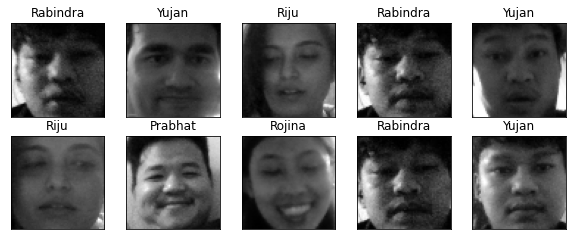

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))

for num, data in enumerate(Tdata[:10]):
    img_data = data[0]
    y = fig.add_subplot(5, 5, num+1)
    image = img_data
    data = image.reshape(-1,64,64,1)
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out)==0:
        label = "Prabhat"
        
    elif np.argmax(model_out)==1:
        label = "Rabindra"
        
    elif np.argmax(model_out)==2:
        label = "Riju"
        
    elif np.argmax(model_out)==3:
        label = "Rojina"
        
    elif np.argmax(model_out)==4:
        label = "Yujan"
        
    y.imshow(img_data,cmap="gray")
    
    plt.title(label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    
plt.show()